In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorportated citipy to determine city based on Latitude and Longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [5]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": -159.32,
        "lat": 22.08
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 78.84,
        "pressure": 1012,
        "humidity": 69,
        "temp_min": 75,
        "temp_max": 80.6
    },
    "visibility": 16093,
    "wind": {
        "speed": 2.57,
        "deg": 61
    },
    "rain": {},
    "clouds": {
        "all": 75
    },
    "dt": 1571979845,
    "sys": {
        "type": 1,
        "id": 7865,
        "country": "US",
        "sunrise": 1571935026,
        "sunset": 1571976333
    },
    "timezone": -36000,
    "id": 5848280,
    "name": "Kapaa",
    "cod": 200
}


In [6]:
print(requests.get(query_url + city))

<Response [200]>


In [7]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

#Include a print log of each city as it's being processed (with the city number and city name).

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop 
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Albany
Processing Record 2 | Eyl
Processing Record 3 | Mahanoro
Processing Record 4 | New Norfolk
City not found. Skipping...
City not found. Skipping...
Processing Record 5 | Yellowknife
City not found. Skipping...
Processing Record 6 | Butaritari
Processing Record 7 | Busselton
Processing Record 8 | Merauke
Processing Record 9 | Nyurba
Processing Record 10 | Puerto Madero
Processing Record 11 | Padang
Processing Record 12 | Muravlenko
Processing Record 13 | Saskylakh
Processing Record 14 | Nikolskoye
Processing Record 15 | Ushuaia
Processing Record 16 | Cayenne
Processing Record 17 | Hofn
Processing Record 18 | Hasaki
Processing Record 19 | Qaanaaq
Processing Record 20 | Rio Gallegos
Processing Record 21 | Linjiang
Processing Record 22 | Vardo
Processing Record 23 | Pisco
Processing Record 24 | Te Anau
Processing Record 25 | Coquimbo
Processing Record 26 | Edd
Processing Record 27 | Iqaluit
Processing Reco

Processing Record 221 | Sao Filipe
Processing Record 222 | Basoko
Processing Record 223 | Oranjemund
Processing Record 224 | Lampazos de Naranjo
Processing Record 225 | Nacimiento
Processing Record 226 | Leninskoye
Processing Record 227 | Nuuk
Processing Record 228 | Richards Bay
City not found. Skipping...
City not found. Skipping...
Processing Record 229 | Dikson
Processing Record 230 | Port Macquarie
Processing Record 231 | College
Processing Record 232 | Carballo
Processing Record 233 | Rotenburg
Processing Record 234 | Coihaique
Processing Record 235 | Grindavik
Processing Record 236 | Bozoum
Processing Record 237 | Alofi
Processing Record 238 | Wladyslawowo
Processing Record 239 | Solnechnyy
Processing Record 240 | Muborak
Processing Record 241 | Wanaka
Processing Record 242 | Ponta do Sol
Processing Record 243 | Qarqin
Processing Record 244 | Baijiantan
Processing Record 245 | Teahupoo
Processing Record 246 | Egvekinot
Processing Record 247 | Pangody
City not found. Skipping...


Processing Record 444 | Mancora
Processing Record 445 | Acapulco
Processing Record 446 | Culebra
Processing Record 447 | Chitipa
City not found. Skipping...
City not found. Skipping...
Processing Record 448 | Quesnel
Processing Record 449 | Calabozo
Processing Record 450 | Sooke
Processing Record 451 | Xichang
Processing Record 452 | Nizwa
Processing Record 453 | Hirara
Processing Record 454 | Ferrol
Processing Record 455 | Pakxan
Processing Record 456 | Syracuse
Processing Record 457 | Aklavik
City not found. Skipping...
Processing Record 458 | Formosa
Processing Record 459 | Ambatondrazaka
Processing Record 460 | Teacapan
Processing Record 461 | Marrakesh
Processing Record 462 | Omboue
Processing Record 463 | Bolobo
Processing Record 464 | Kamiiso
Processing Record 465 | Waddan
Processing Record 466 | Yar-Sale
Processing Record 467 | Prince Albert
Processing Record 468 | Ulaanbaatar
Processing Record 469 | Moulins
Processing Record 470 | Tuatapere
Processing Record 471 | Noumea
Proce

In [8]:
# Convert Raw Data to DataFrame
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()


City               536
Country            536
Date               536
Latitude           536
Longitude          536
Max Temperature    536
Humidity           536
Cloudiness         536
Wind Speed         536
dtype: int64

In [9]:
# Display DataFrame
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Albany,US,1571979798,42.65,-73.75,50.00,75,1,5.82
1,Eyl,SO,1571979845,7.98,49.82,81.32,70,67,6.55
2,Mahanoro,MG,1571979846,-19.90,48.80,76.24,84,37,18.75
3,New Norfolk,AU,1571979846,-42.78,147.06,66.20,39,71,21.92
4,Yellowknife,CA,1571979846,62.45,-114.38,30.20,86,75,16.11


In [10]:
# Export & Save Data Into a .csv.
weather_data.to_csv("./weatherData.csv")

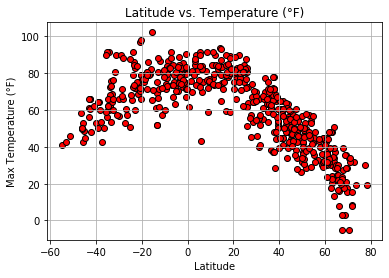

In [11]:
# Plotting the Data
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="red", marker="o", edgecolor="black")

# Use proper labeling of the plots using plot titles and axes labels
plt.title("Latitude vs. Temperature (°F)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

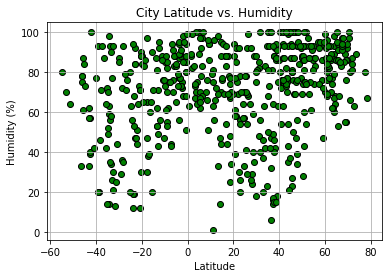

In [12]:
# Plotting the Data
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="green", marker="o", edgecolor="black")
# Use proper labeling of the plots using plot titles and axes labels
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./City_Latitude_vs_Humidity.png")

# Show Plot
plt.show()

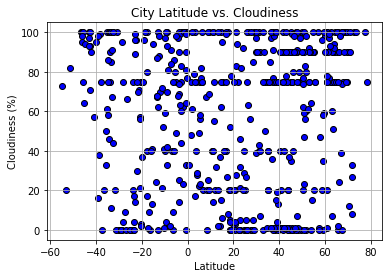

In [13]:
# Plotting the Data
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")

# Use proper labeling of the plots using plot titles and axes labels
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

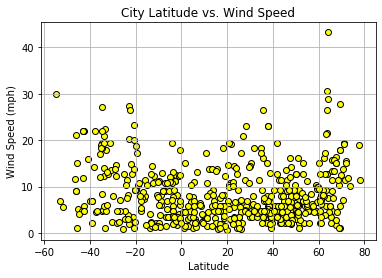

In [14]:
# Plotting the Data
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="yellow", marker="o", edgecolor="black")

# Use proper labeling of the plots using plot titles and axes labels
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./City_Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()
